Date
2022-08-04         NaN
2022-08-03         NaN
2022-08-02         NaN
2022-08-01         NaN
2022-07-29         NaN
                ...   
2010-01-08    6.953343
2010-01-07    6.937090
2010-01-06    6.921914
2010-01-05    6.908978
2010-01-04    6.897006
Name: Close, Length: 3169, dtype: float64
Date
2022-08-04         NaN
2022-08-03         NaN
2022-08-02         NaN
2022-08-01         NaN
2022-07-29         NaN
                ...   
2010-01-08    7.532251
2010-01-07    7.517503
2010-01-06    7.502498
2010-01-05    7.487859
2010-01-04    7.473319
Name: Close, Length: 3169, dtype: float64
(2218, 1)
(951, 1)
(951, 100, 1)
(951,)
30/30 [==============================] - 1s 23ms/step


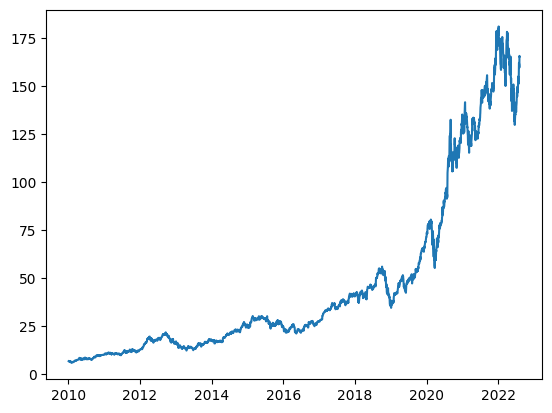

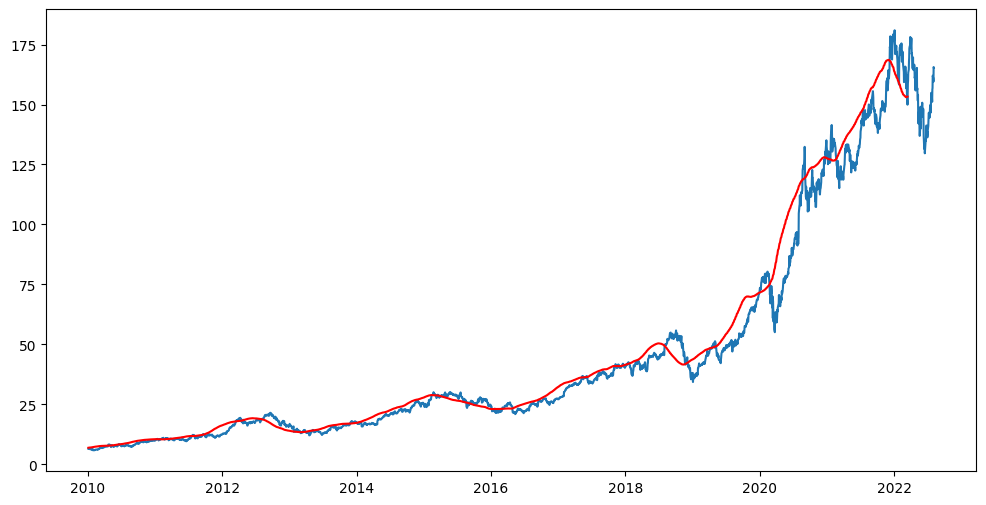

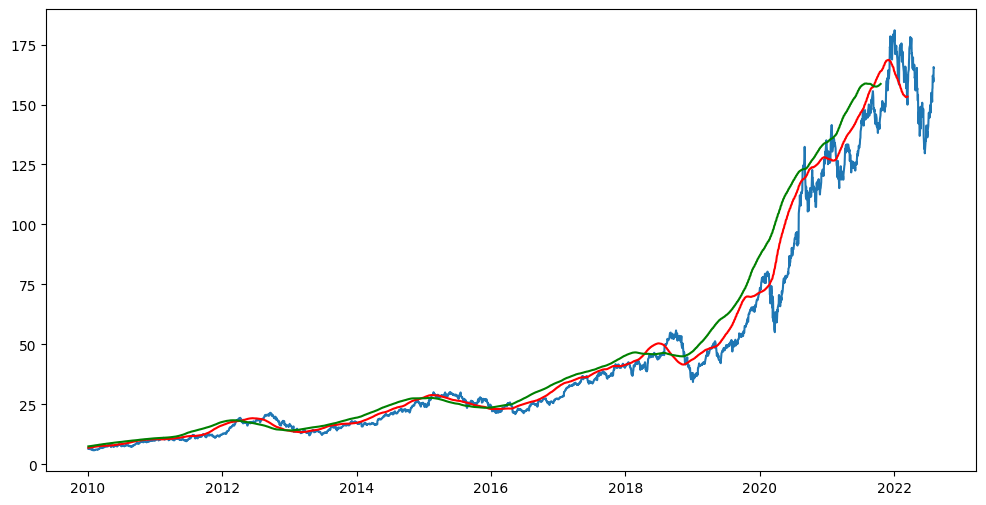

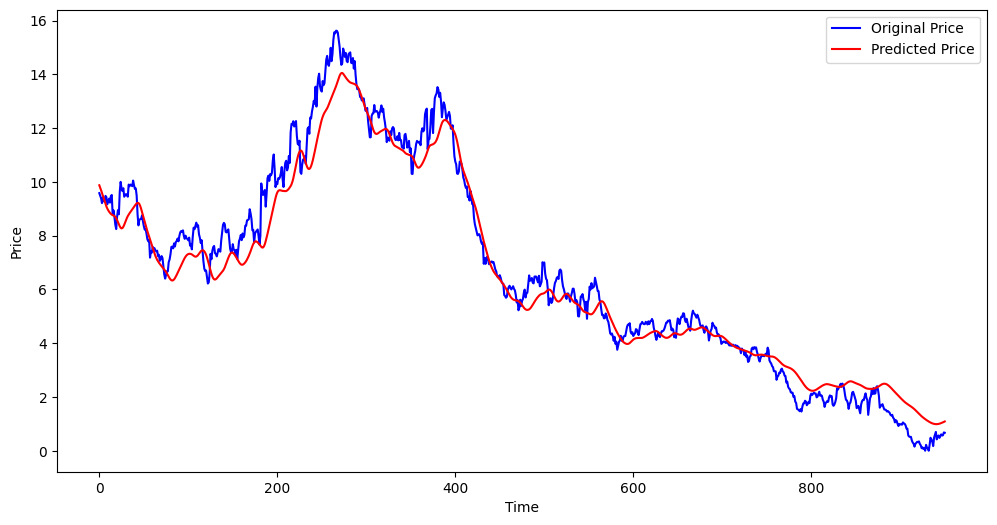

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import matplotlib.animation as animation
import tensorflow
from tkinter import *
from tkinter import ttk
import tkinter as tk
from PIL import ImageTk, Image


start ='2010-01-01'
end ='2022-8-4'
def search():
    


    ticker=entry.get()
    df=data.DataReader(ticker, 'stooq', start, end)
    #df=df.to_frame()
    #df.head()
    #df2 = df.sort_values(by='Date', inplace = True) 
    #print(df)
    #df.head()
    #df=df.drop('Date', axis=1)
    df.head()
    plt.plot(df.Close)
    plt.savefig("plot1.jpg")

    ma100=df.Close.rolling(100).mean()
    print(ma100)

    plt.figure(figsize = (12,6))
    plt.plot(df.Close)
    plt.plot(ma100, 'r')

    ma200=df.Close.rolling(200).mean()
    print(ma200)

    plt.figure(figsize = (12,6))
    plt.plot(df.Close)
    plt.plot(ma100, 'r')
    plt.plot(ma200, 'g')
    plt.savefig("plot2.jpg")

    #Splitting data into training and testing
    data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
    data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
    print(data_training.shape)
    print(data_testing.shape)

    #import sklearn
    scaler=MinMaxScaler(feature_range=(0,1))

    data_training_array=scaler.fit_transform(data_training)
    data_training_array

    x_train=[]
    y_train=[]

    for i in range(100, data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])

    x_train,y_train = np.array(x_train), np.array(y_train)

#     #ML Model
    from keras.layers import Dense, Dropout, LSTM
    from keras.models import Sequential, load_model

#     model=Sequential()


#     model.add(LSTM(units=50, activation ='relu', return_sequences=True, input_shape=(x_train.shape[1],1) ))
#     model.add(Dropout(0.2))


#     model.add(LSTM(units=60, activation ='relu', return_sequences=True))
#     model.add(Dropout(0.3))

#     model.add(LSTM(units=80, activation ='relu', return_sequences=True))
#     model.add(Dropout(0.4))

#     model.add(LSTM(units=120, activation ='relu' ))
#     model.add(Dropout(0.5))

#     model.add(Dense(units=1))

#     model.summary()

#     model.compile(optimizer='adam', loss='mean_squared_error')
#     model.fit(x_train,y_train, epochs=10)

    model=load_model('keras_model.h5')

    past_100days=data_training.tail(100)

    final_df=pd.concat([past_100days,data_testing], ignore_index=True)

    final_df.head()

    input_data=scaler.fit_transform(final_df)
    input_data

    input_data.shape

    x_test=[]
    y_test=[]

    for i in range(100, input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i,0])

    x_test, y_test= np.array(x_test), np.array(y_test)
    print(x_test.shape)
    print(y_test.shape)

    #Making predictions

    y_predicted=model.predict(x_test)

    y_predicted.shape

    y_test

    y_predicted

    scaler.scale_

    scale_factor=1/0.06402036
    y_predicted=y_predicted*scale_factor
    y_test=y_test*scale_factor

    plt.figure(figsize=(12,6))
    plt.plot(y_test, 'b', label='Original Price')
    plt.plot(y_predicted, 'r', label='Predicted Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    plt.savefig("plot3.jpg")

#     %matplotlib notebook
#     df2 = df.iloc[::-1]
#     ma1002=df2.Close.rolling(100).mean()
#     ma2002=df2.Close.rolling(200).mean()
#     fig = plt.figure()

#     #print(df['Close'][:i])
#     def animate(i):
#         # Plot the first i data points
#         plt.cla()

#         plt.plot(df2['Close'][i:i+100], 'b')
#         plt.plot(ma1002[i:i+100], 'r')
#         plt.plot(ma2002[i:i+100:], 'g')
#         #plt.gca().invert_xaxis()
#         plt.title('AAPL Stock Price')
#         plt.xlabel('Date')
#         plt.ylabel('Price')

    # Set up the figure and animation

#     ani =animation.FuncAnimation(fig, animate, frames=len(df), interval=100)

#     # Show the animated graph

#     plt.show()
#     ani.save('animation.avi', writer='ffmpeg')
    
    
#     canvas = tk.Canvas(root)
#     canvas.pack(side="left", fill="both", expand=True)

#     # create a frame inside the canvas
#     frame = tk.Frame(canvas)
    

#     # create a vertical scrollbar for the canvas
#     scrollbar = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
#     scrollbar.pack(side="right", fill="y")

#     # configure the canvas to use the scrollbar
#     canvas.configure(yscrollcommand=scrollbar.set)

#     # load three images
#     image1 = Image.open("plot1.jpg")
#     image2 = Image.open("plot2.jpg")
#     image3 = Image.open("plot3.jpg")

#     # create PhotoImage objects from the images
#     photo1 = ImageTk.PhotoImage(image1)
#     photo2 = ImageTk.PhotoImage(image2)
#     photo3 = ImageTk.PhotoImage(image3)

#     # create labels inside the frame for the images
#     label1 = tk.Label(root, image=photo1)
#     label2 = tk.Label(root, image=photo2)
#     label3 = tk.Label(root, image=photo3)

#     # pack the labels inside the frame
#     label1.pack()
#     label2.pack()
#     label3.pack()

    # configure the canvas to scroll with the frame
#     canvas.update_idletasks()
#     frame.bind("<Configure>", lambda event: canvas.configure(scrollregion=canvas.bbox("all")))
#     canvas.create_window((0, 0), window=frame, anchor="nw")



    img1=Image.open("plot1.jpg")
    img2=Image.open("plot2.jpg")
    img3=Image.open("plot3.jpg")
    
    photo1=ImageTk.PhotoImage(img1)
    photo2=ImageTk.PhotoImage(img2)
    photo3=ImageTk.PhotoImage(img3)
    
    label1=tk.Label(root, image=photo1)
    label2=tk.Label(root, image=photo2)
    label3=tk.Label(root, image=photo3)
    
#     label1.pack()
    label2.pack()
    label3.pack()


    


root=Tk()
root.geometry("420x420")
root.config(bg="grey")

#For label
label_name = Label(root,text="TradeSuccess",font=('Montserrat', 28))
label_name.place(x=0,y=0)

# # For scroll bar
# v_s = Scrollbar(root)
# v_s.pack(side=RIGHT,fill=Y)

# h_s = Scrollbar(root,orient='horizontal')
# h_s.pack(side=BOTTOM,fill=X)

# textarea=Text(root,width=25, height=15, wrap=NONE,
#               yscrollcommand=v_s.set, xscrollcommand=h_s.set)


# v_s.config(command=textarea.yview)
# h_s.config(command=textarea.xview)

# def on_mousewheel(root):
#     v_s.yview_scroll(int(-1*(event.delta/120)), "units")

# # bind mousewheel event to scrollable frame
# v_s.bind("<MouseWheel>", on_mousewheel)


# For Nav bar
def toggle_menu():

    def collapse_toggle_menu():
        toggle_menu_fm.destroy()
        toggle_btn.config(text='☰')
        toggle_btn.config(command=toggle_menu)

# Buttons in navbar        
    toggle_menu_fm = tk.Frame(root,bg='white')

    home_btn = tk.Button(toggle_menu_fm, text='HOME',font=('Bold', 20),bd=0, bg="black", fg="white",
                         activebackground='black', activeforeground='white')
    home_btn.place(x=20,y=0)
    

    
    about_btn = tk.Button(toggle_menu_fm, text='ABOUT',font=('Bold', 20),bd=0, bg="black", fg="white",
                         activebackground='black', activeforeground='white')
    about_btn.place(x=20,y=60)


    logout_btn = tk.Button(toggle_menu_fm, text='LOGOUT',font=('Bold', 20),bd=0, bg="black", fg="white",
                         activebackground='black', activeforeground='white')
    logout_btn.place(x=20,y=120)


    window_height=200



    toggle_menu_fm.place(x=1700, y=50, height=window_height, width=200)

    toggle_btn.config(text="X")
    toggle_btn.config(command=collapse_toggle_menu)




toggle_btn = tk.Button(root, text='☰',bg='black', fg='white',
                       font=('Bold', 20), bd=0,activebackground='black', activeforeground='white',command=toggle_menu)
 
toggle_btn.pack(side=tk.TOP, anchor=tk.E)

S1 = tk.Button(root, text='Search',bg='black', fg='white',
                       font=('Bold', 15), bd=0,activebackground='black', activeforeground='white',command=search)
S1.place(x=900,y=120)


#For search button

#def search_button():
    
    
    





#For placeholder tex

def on_entry_focus_in(event):
    if entry.get() == "Enter Stock Ticker":
        entry.delete(0, tk.END)
        entry.config(fg='black')

def on_entry_focus_out(event):
    if entry.get() == "":
        entry.insert(0, "Enter Stock Ticker")
        entry.config(fg='gray')


placeholder_text = "Enter Stock Ticker"
entry = tk.Entry(root,fg='gray',bd =5,width=20,font=("Montserrat", 24))
placeholder_text = "Enter Stock Ticker"
entry.insert(0, placeholder_text)
ticker=entry.get()
entry.bind("<FocusIn>", on_entry_focus_in)
entry.bind("<FocusOut>", on_entry_focus_out)
entry.place(x=750,y=70)


def on_root_click(event):
    placeholder_text = "Enter Stock Ticker"
    entry.insert(0, placeholder_text)
root.bind("<FocusOut>",on_root_click)


root.mainloop()

In [15]:
from keras.models import Sequential, load_model
model=load_model("keras_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

(2218, 1)
(951, 1)
(951, 100, 1)
(951,)
30/30 [==============================] - 1s 25ms/step


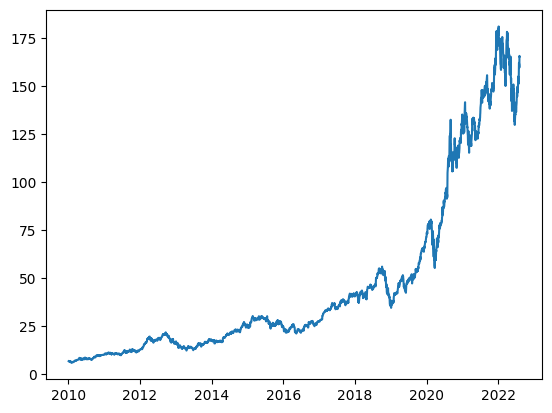

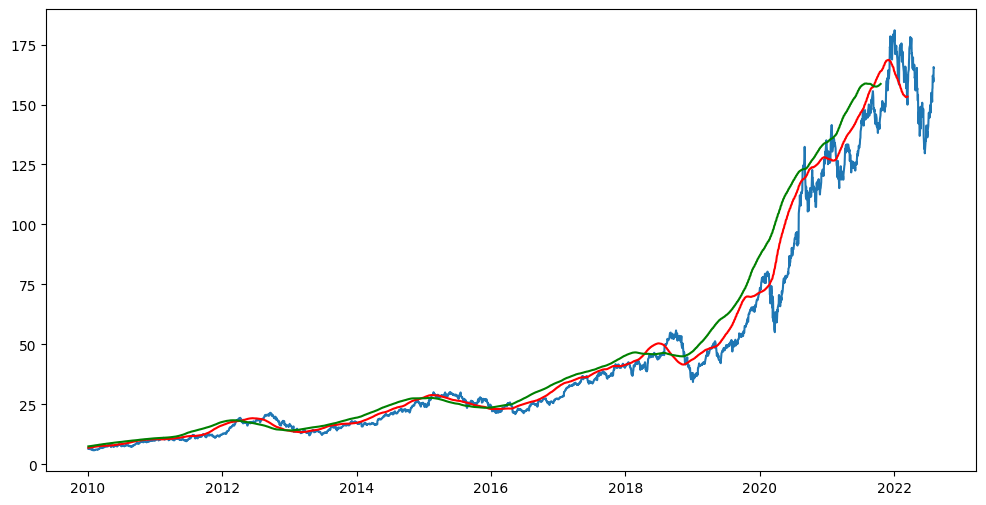

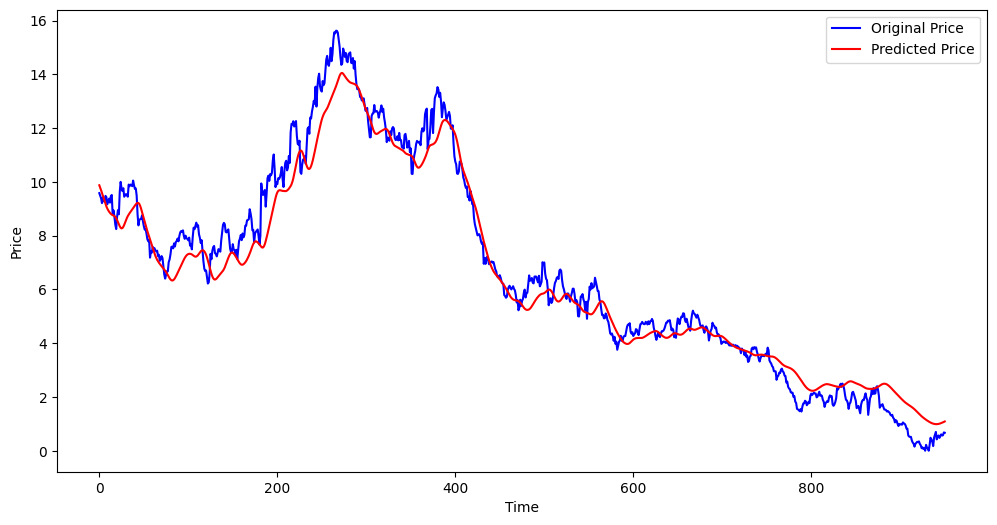

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\soham\anaconda3\envs\stocks\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\soham\AppData\Local\Temp\ipykernel_10620\2460157559.py", line 135, in generate_plots
    self.plot1_label.configure(image=self.plot1_tk)
AttributeError: 'StockGrapher' object has no attribute 'plot1_label'


<Figure size 640x480 with 0 Axes>

In [17]:
class StockGrapher:
    start ='2010-01-01'
    end ='2022-8-4'
    def __init__(self, master):
        self.master = master
        master.title("Stock Grapher")

        # Create and place widgets
        self.ticker_label = tk.Label(master, text="Enter Stock Ticker:")
        self.ticker_label.pack()

        self.ticker_entry = tk.Entry(master)
        self.ticker_entry.pack()

        self.generate_button = tk.Button(master, text="Generate Plots", command=self.generate_plots)
        self.generate_button.pack()

        # Load and display saved plots
#         self.plot1 = Image.open("plot1.png")
#         self.plot1_tk = ImageTk.PhotoImage(self.plot1)
#         self.plot1_label = tk.Label(master, image=self.plot1_tk)
#         self.plot1_label.pack()

#         self.plot2 = Image.open("plot2.png")
#         self.plot2_tk = ImageTk.PhotoImage(self.plot2)
#         self.plot2_label = tk.Label(master, image=self.plot2_tk)
#         self.plot2_label.pack()

#         self.plot3 = Image.open("plot3.png")
#         self.plot3_tk = ImageTk.PhotoImage(self.plot3)
#         self.plot3_label = tk.Label(master, image=self.plot3_tk)
#         self.plot3_label.pack()
        
    def generate_plots(self):
        # Get the stock ticker entered by the user
        ticker = self.ticker_entry.get()
        df=data.DataReader(ticker, 'stooq', start, end)
        plt.plot(df.Close)
        plt.savefig("plot1.png")
        
        ma100=df.Close.rolling(100).mean()
        ma200=df.Close.rolling(200).mean()
        plt.figure(figsize = (12,6))
        plt.plot(df.Close)
        plt.plot(ma100, 'r')
        plt.plot(ma200, 'g')
        plt.savefig("plot2.png")
        
        data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
        data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
        print(data_training.shape)
        print(data_testing.shape)

        #import sklearn
        scaler=MinMaxScaler(feature_range=(0,1))

        data_training_array=scaler.fit_transform(data_training)
        data_training_array

        x_train=[]
        y_train=[]

        for i in range(100, data_training_array.shape[0]):
            x_train.append(data_training_array[i-100:i])
            y_train.append(data_training_array[i,0])

        x_train,y_train = np.array(x_train), np.array(y_train)
        
        model=load_model('keras_model.h5')

        past_100days=data_training.tail(100)

        final_df=pd.concat([past_100days,data_testing], ignore_index=True)

        final_df.head()

        input_data=scaler.fit_transform(final_df)
        input_data

        input_data.shape

        x_test=[]
        y_test=[]

        for i in range(100, input_data.shape[0]):
            x_test.append(input_data[i-100:i])
            y_test.append(input_data[i,0])

        x_test, y_test= np.array(x_test), np.array(y_test)
        print(x_test.shape)
        print(y_test.shape)

        #Making predictions

        y_predicted=model.predict(x_test)

        y_predicted.shape

        y_test

        y_predicted

        scaler.scale_

        scale_factor=1/0.06402036
        y_predicted=y_predicted*scale_factor
        y_test=y_test*scale_factor

        plt.figure(figsize=(12,6))
        plt.plot(y_test, 'b', label='Original Price')
        plt.plot(y_predicted, 'r', label='Predicted Price')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
        plt.savefig("plot3.png")

        
        

        # Generate and save plots based on the ticker
        # Replace this with your own code to generate and save plots
#     plot1 = generate_plot1(ticker)
#     plot1.save("plot1.png")

#     plot2 = generate_plot2(ticker)
#     plot2.save("plot2.png")

#     plot3 = generate_plot3(ticker)
#     plot3.save("plot3.png")

    # Load and display the saved plots
        self.plot1 = Image.open("plot1.png")
        self.plot1_tk = ImageTk.PhotoImage(self.plot1)
        self.plot1_label.configure(image=self.plot1_tk)

        self.plot2 = Image.open("plot2.png")
        self.plot2_tk = ImageTk.PhotoImage(self.plot2)
        self.plot2_label.configure(image=self.plot2_tk)

        self.plot3 = Image.open("plot3.png")
        self.plot3_tk = ImageTk.PhotoImage(self.plot3)
        self.plot3_label.configure(image=self.plot3_tk)


root = tk.Tk()
app = StockGrapher(root)
root.mainloop()






